In [1]:
#import scltnn
import scanpy as sc
import scvelo as scv
import anndata
import numpy as np

In [2]:
import omicverse as ov
ov.utils.ov_plot_set()

2024-12-14 13:49:24.126563: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-14 13:49:24.391862: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-14 13:49:24.485870: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 13:49:30.673316: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.9, Tutorials: https://omicverse.readthedocs.io/
Dependency error: (pydeseq2 0.4.11 (/mnt/home/zehuazeng/software/rsc/lib/python3.10/site-packages), Requirement.parse('pydeseq2<=0.4.0,>=0.3'))


In [3]:
adata_mouse=sc.read('data/Bonemarrow_cellxgene_92fa8bf6-3f82-4064-96c6-94cf903f96a6.h5ad')
adata_mouse

AnnData object with n_obs × n_vars = 14517 × 21069
    obs: 'FACS.selection', 'age', 'cell', 'free_annotation', 'method', 'donor_id', 'subtissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'age_colors', 'citation', 'leiden', 'louvain', 'neighbors', 'pca', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp

In [6]:
adata_mouse.X.max()

10.0

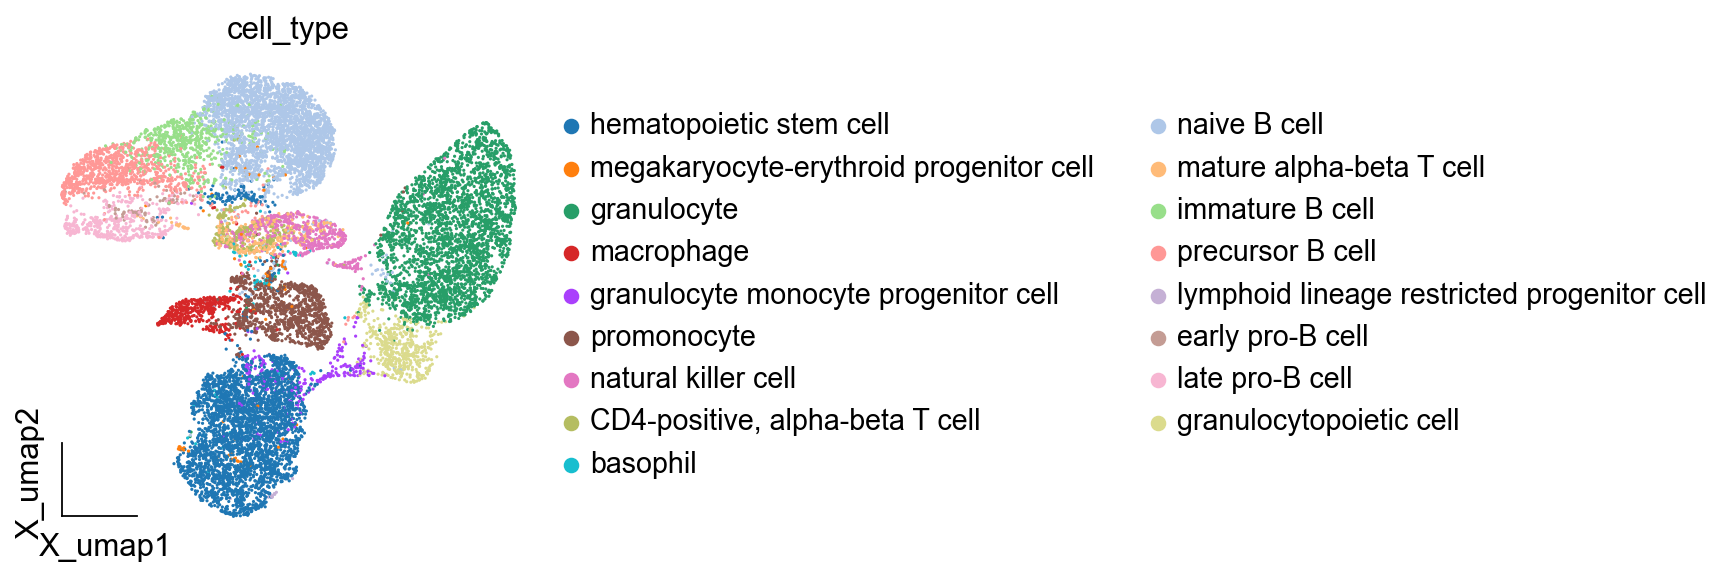

In [5]:
ov.pl.embedding(
    adata_mouse,
    basis='X_umap',
    color='cell_type',
    frameon='small'
)

In [36]:
Traj=ov.single.TrajInfer(adata_mouse,basis='X_umap',groupby='cell_type',
                         use_rep='X_pca',n_comps=50)
Traj.set_origin_cells('hematopoietic stem cell')
Traj.set_terminal_cells(["late pro-B cell","granulocyte"])

In [37]:
Traj.inference(method='slingshot',num_epochs=1)

Lineages: [Lineage[6, 8, 2], Lineage[6, 12, 1, 16], Lineage[6, 12, 4, 5], Lineage[6, 12, 10], Lineage[6, 12, 11, 0], Lineage[6, 12, 11, 14], Lineage[6, 12, 13, 7, 15, 3, 4, 5]]


  0%|          | 0/1 [00:00<?, ?it/s]

Reversing from leaf to root
Averaging branch @11 with lineages: [4, 5] [<pcurvepy2.pcurve.PrincipalCurve object at 0x7f81b3782d10>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7f81b3781f90>]
Averaging branch @12 with lineages: [1, 2, 3, 4, 5, 6] [<pcurvepy2.pcurve.PrincipalCurve object at 0x7f81b3782830>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7f81b3783a30>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7f81b37820b0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7f81b37822f0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7f81b3781fc0>]
Averaging branch @6 with lineages: [0, 1, 2, 3, 4, 5, 6] [<pcurvepy2.pcurve.PrincipalCurve object at 0x7f81b3782920>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7f81b3783c70>]
Shrinking branch @6 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x7f81b3782920>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7f81b3783c70>]
Shrinking branch @12 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x7f81b3782830>, <pcurvepy2.pcurve.Princip

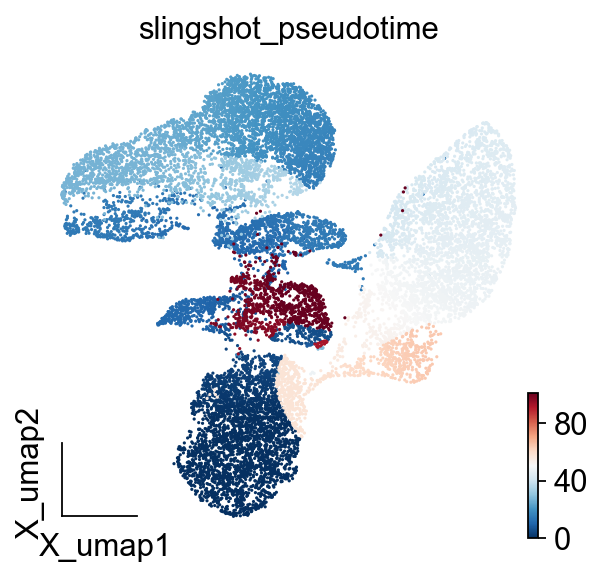

In [38]:
ov.pl.embedding(
    adata_mouse,
    basis='X_umap',
    color='slingshot_pseudotime',
    frameon='small'
)

In [ ]:
v0 = ov.single.pyVIA(adata=adata,adata_key='X_pca',adata_ncomps=80, basis='X_umap',
                         clusters='cell_type',knn=30,random_seed=4,root_user=['hematopoietic stem cell'],)

v0.run()

In [33]:
#you can use `v0.model.single_cell_pt_markov` to extract the pseudotime
v0.get_pseudotime(v0.adata)
v0.adata

...the pseudotime of VIA added to AnnData obs named `pt_via`


AnnData object with n_obs × n_vars = 14517 × 2650
    obs: 'FACS.selection', 'age', 'cell', 'free_annotation', 'method', 'donor_id', 'subtissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'p_time', 'p_time_r', 'p_latent_time', 'dpt_pseudotime', 'dpt_pseudotime_p', 'p_ANN_time', 'LTNN_time', 'LTNN_time_r', 'pt_via'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'age_colors', 'citation', 'leiden', 'louvain', 

In [39]:
#you can use `v0.model.single_cell_pt_markov` to extract the pseudotime
v0.get_pseudotime(adata_mouse)
adata_mouse.obs['pt_via']=1-adata_mouse.obs['pt_via']

...the pseudotime of VIA added to AnnData obs named `pt_via`


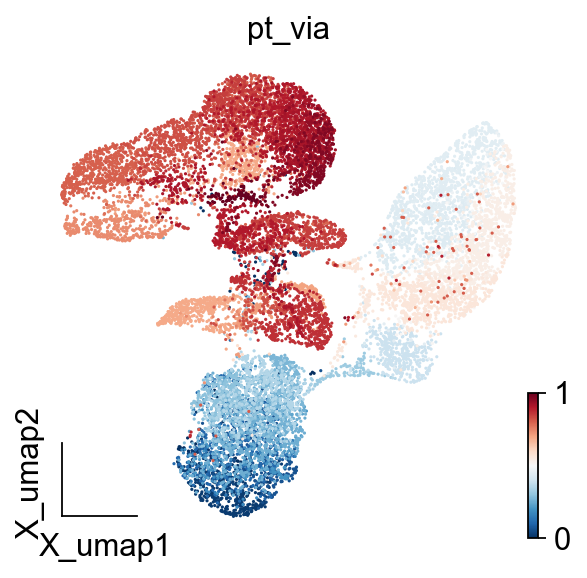

In [40]:
ov.pl.embedding(
    adata_mouse,
    basis='X_umap',
    color='pt_via',
    frameon='small'
)

In [9]:
adata=adata_mouse[:,adata_mouse.var['highly_variable']==True]
adata

View of AnnData object with n_obs × n_vars = 14517 × 2650
    obs: 'FACS.selection', 'age', 'cell', 'free_annotation', 'method', 'donor_id', 'subtissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'age_colors', 'citation', 'leiden', 'louvain', 'neighbors', 'pca', 'schema_reference', 'schema_version', 'title', 'cell_type_colors'
    obsm: 'X_pca', 'X_tsne', 'X_uma

In [10]:
import Epiverse as ev
ev.utils.lsi(adata, n_components=20, n_iter=15)

In [11]:
#import scltnn
ltnn_obj=ov.single.scLTNN(adata,basis='X_lsi',input_dim=20,)

In [12]:
ltnn_obj.ANNmodel_load('../LTNN/model/model_human.h5')
ltnn_obj.cal_paga(use_rep='X_pca',resolution=2)
ltnn_obj.cal_model_time()

......calculate paga
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:17)
running Leiden clustering
    finished: found 43 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:02)
......predict model_time


In [13]:
ltnn_obj.cal_exp_gene_value(rev=False,mode='ann')

filtered out 1342 cells that have less than 200 genes expressed
gene in p_time_low 0.05730963 gene in p_time_high 1.1897694


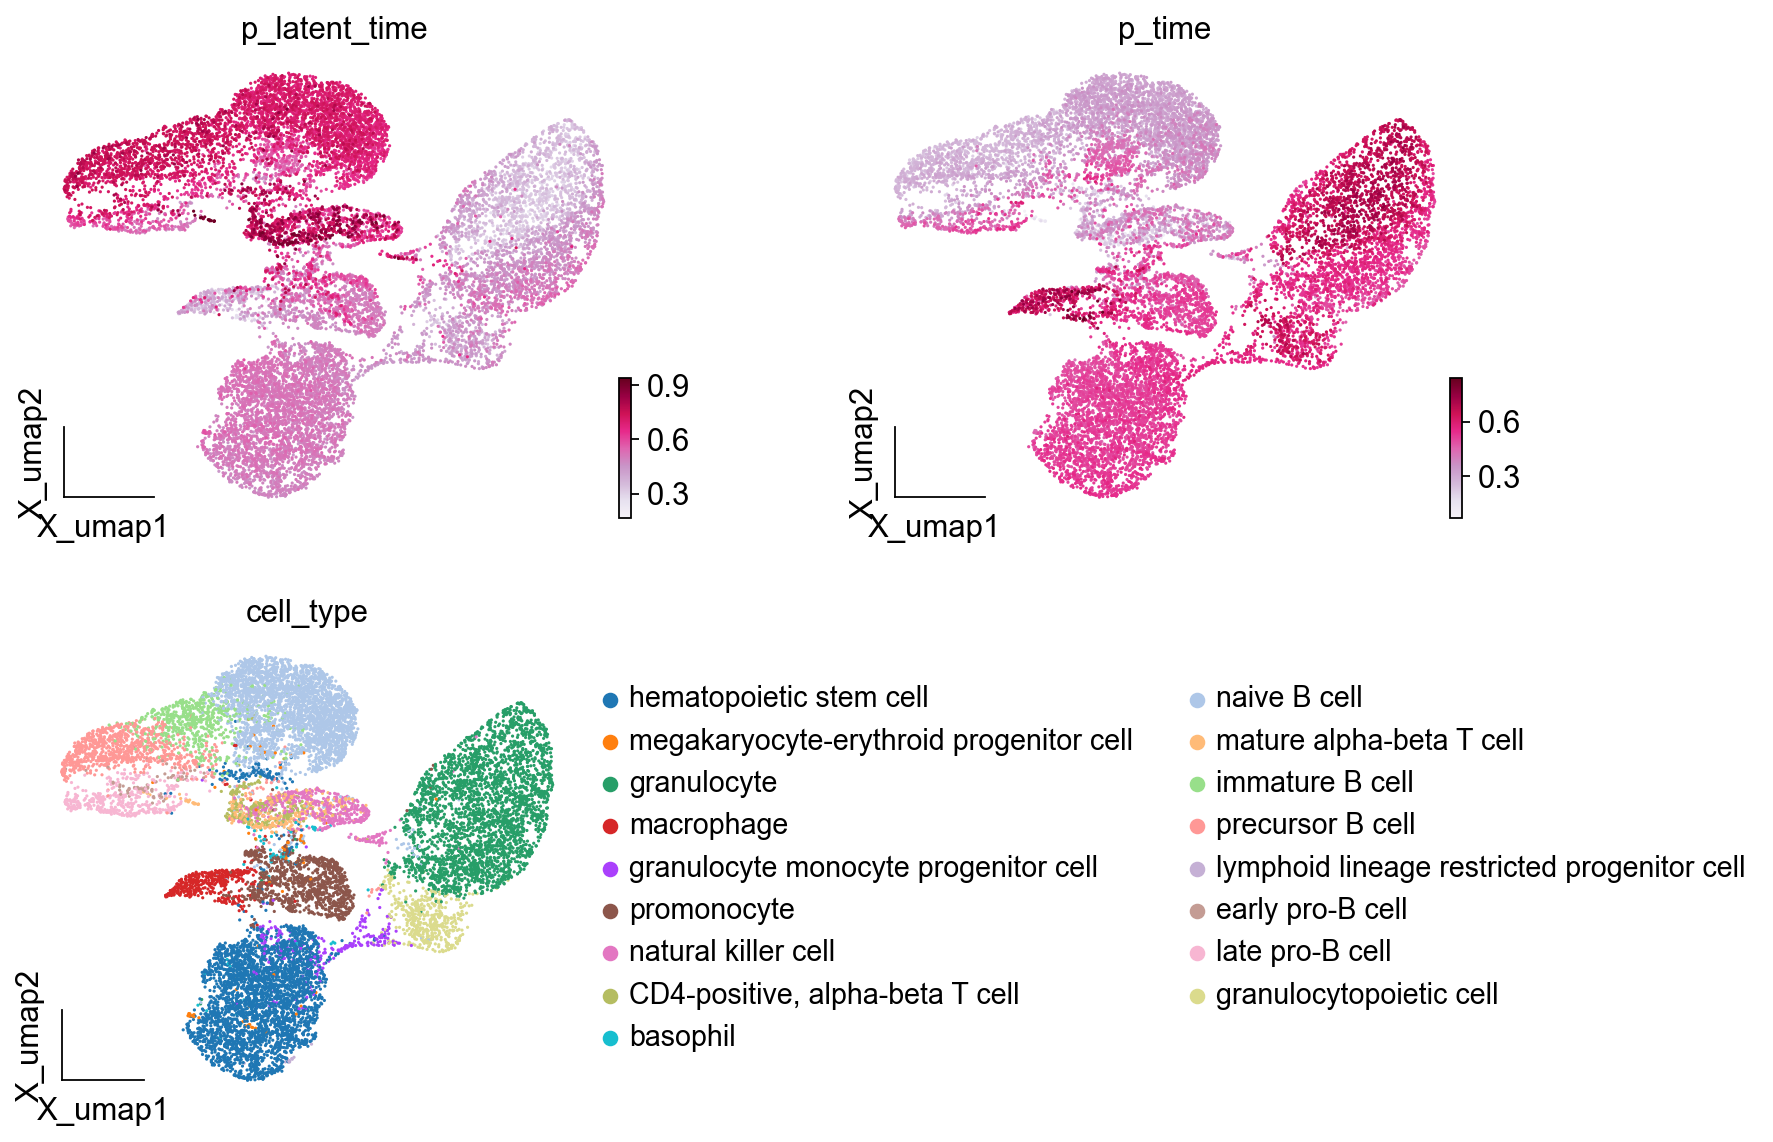

In [15]:
ov.utils.embedding(adata,basis='X_umap', 
                   color=['p_latent_time','p_time','cell_type'], 
               cmap='PuRd',legend_loc='right margin',frameon='small',ncols=2,wspace=0.4)

In [16]:
ltnn_obj.cal_dpt_pseudotime(leiden_range_start=0.1,leiden_range_mid=0.1,leiden_range_end=0.2)

......calculate dpt_pseudotime
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9999714  0.99809587 0.99796945 0.9954278  0.9944786
     0.99293625 0.9925904  0.9917631  0.9916835  0.989295   0.9876375
     0.9868216  0.98646677 0.9837311 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:11)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)
......leiden_start: ['18', '5', '4', '14', '27', '12']
......leiden_middle ['38', '15', '11', '23', '29', '21', '7', '13', '32', '9', '19', '6', '36', '26', '25', '24', '31', '0', '22', '17', '39', '2', '30', '41', '8', '40']
......leiden_end ['34', '3', '28', '37', '35', '33', '16']


--> added 'pos', the PAGA positions (adata.uns['paga'])


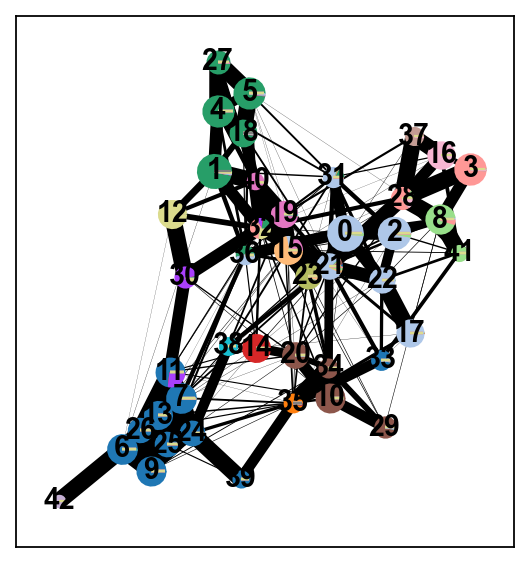

In [17]:
sc.pl.paga(ltnn_obj.adata, color=['cell_type'],cmap='PuRd',)
          #title=['Panceras\nStage','Panceras\ndpt_pseudotime'],)
          #save='_fig3_pancreas.png')

In [18]:
ltnn_obj.ANN(batch_size=30,n_epochs=200,verbose=0)

......ANN


ANN model: 100%|██████████| 200/200 [05:02<00:00,  1.51s/it, val loss, val mae=0.00258, 0.00258]


In [19]:
ltnn_obj.cal_distrubute()
ltnn_obj.cal_scLTNN_time()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 47.8678] [loc=0.551 scale=0.144]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 133.824] [loc=0.000 scale=0.551]
[distfit] >INFO> [pareto    ] [0.03 sec] [RSS: 133.824] [loc=-134217728.000 scale=134217728.000]


......Dweibull analysis


[distfit] >INFO> [dweibull  ] [0.24 sec] [RSS: 38.3386] [loc=0.527 scale=0.112]
[distfit] >INFO> [t         ] [1.73 sec] [RSS: 47.97] [loc=0.552 scale=0.138]
[distfit] >INFO> [genextreme] [1.29 sec] [RSS: 47.8618] [loc=0.500 scale=0.149]
[distfit] >INFO> [gamma     ] [0.46 sec] [RSS: 47.0697] [loc=-2.248 scale=0.008]
[distfit] >INFO> [lognorm   ] [1.41 sec] [RSS: 47.7817] [loc=-46.427 scale=46.977]
[distfit] >INFO> [beta      ] [0.85 sec] [RSS: 51.5264] [loc=-1440638.878 scale=1440640.294]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 104.845] [loc=0.000 scale=1.000]
[distfit] >INFO> [loggamma  ] [0.13 sec] [RSS: 51.243] [loc=-0.534 scale=0.464]
[distfit] >INFO> [norm      ] [6.19 sec] [RSS: 47.8678] [loc=0.551 scale=0.144]
[distfit] >INFO> [expon     ] [6.19 sec] [RSS: 133.824] [loc=0.000 scale=0.551]
[distfit] >INFO> [pareto    ] [6.18 sec] [RSS: 133.824] [loc=-134217728.000 scale=134217728.000]
[distfit] >INFO> [dweibull  ] [6.15 sec] [RSS: 38.3386] [loc=0.527 scale=0.112]
[distfit

......Norm analysis


[distfit] >INFO> [dweibull  ] [0.59 sec] [RSS: 62.6083] [loc=0.486 scale=0.153]
[distfit] >INFO> [t         ] [2.72 sec] [RSS: 113.918] [loc=0.439 scale=0.247]
[distfit] >INFO> [genextreme] [1.07 sec] [RSS: 116.605] [loc=0.349 scale=0.244]
[distfit] >INFO> [gamma     ] [0.51 sec] [RSS: 114.878] [loc=-4.431 scale=0.013]
[distfit] >INFO> [lognorm   ] [0.95 sec] [RSS: 114.872] [loc=-6.822 scale=7.256]
[distfit] >INFO> [beta      ] [1.05 sec] [RSS: 121.908] [loc=-0.028 scale=1.093]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 132.784] [loc=-0.027 scale=1.092]
[distfit] >INFO> [loggamma  ] [0.41 sec] [RSS: 113.788] [loc=-63.352 scale=8.914]
[distfit] >INFO> [norm      ] [7.41 sec] [RSS: 113.918] [loc=0.439 scale=0.247]
[distfit] >INFO> [expon     ] [7.41 sec] [RSS: 144.183] [loc=-0.027 scale=0.466]
[distfit] >INFO> [pareto    ] [7.40 sec] [RSS: 144.183] [loc=-67108864.027 scale=67108864.000]
[distfit] >INFO> [dweibull  ] [7.34 sec] [RSS: 62.6083] [loc=0.486 scale=0.153]
[distfit] >INFO> [

......calculate scLTNN time


In [ ]:
import scvelo as scv
scv.tl.paga(ltnn_obj.adata, groups='leiden',
            vkey='paga',use_time_prior='LTNN_time')

In [ ]:
ltnn_obj.adata

--> added 'pos', the PAGA positions (adata.uns['paga'])


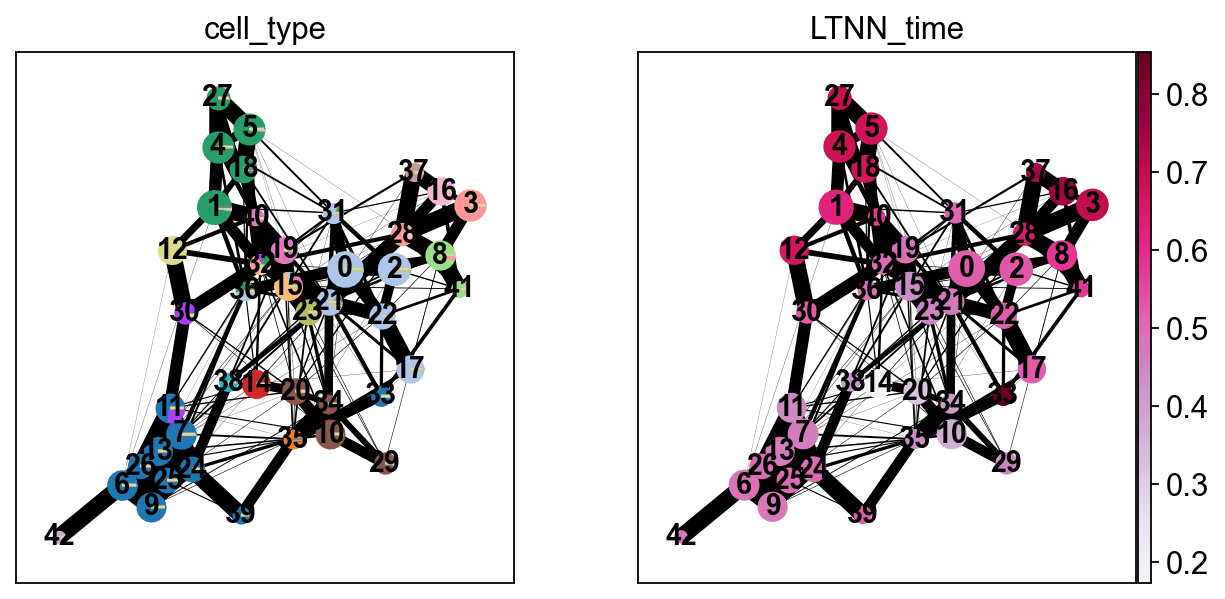

In [22]:
sc.pl.paga(ltnn_obj.adata, color=['cell_type','LTNN_time'],cmap='PuRd',
          #title=['Panceras\nStage','Panceras\nLTNN_time'],
          )
          #save='_fig3_pancreas.png')

In [23]:
import torch
X_val=ltnn_obj.adata.obsm[ltnn_obj.basis]
X_val = torch.tensor(X_val, dtype=torch.float32).to(ltnn_obj.device)

In [24]:
import torch.nn.functional as F
x=ltnn_obj.model.fc1(X_val)
x=F.relu(x)
x=ltnn_obj.model.fc2(x)
x=F.relu(x)
x=ltnn_obj.model.fc3(x)

In [25]:
ltnn_obj.adata.obsm['X_ltnn']=x.cpu().detach().numpy()

In [26]:
sc.pp.neighbors(ltnn_obj.adata,use_rep='X_ltnn')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)


In [27]:
import scvelo as scv
ltnn_obj.adata.uns['paga_graph']=ltnn_obj.adata.obsp['connectivities']

In [ ]:
ov.utils.cal_paga(adata,use_time_prior='LTNN_time',vkey='paga',
                 groups='clusters')

In [29]:
import scvelo as scv
scv.tl.paga(ltnn_obj.adata, groups='cell_type',
            vkey='paga',use_time_prior='LTNN_time')

running PAGA using priors: ['LTNN_time']
    finished (0:00:08) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


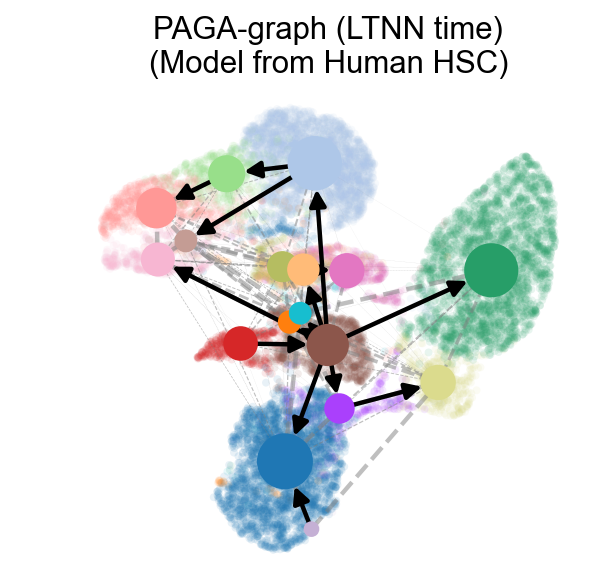

In [31]:
#fig, ax = plt.subplots(figsize=(3,3))
import matplotlib.pyplot as plt
ax=scv.pl.paga(ltnn_obj.adata, basis='umap', size=50, alpha=.1,title='PAGA-graph (LTNN_time)\n(Model from Human HSC)',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
plt.savefig("figures/review/hsc_mouse_paga_graph_ltnn.png",dpi=300,bbox_inches = 'tight')

In [41]:
sc.pp.neighbors(ltnn_obj.adata,use_rep='X_pca')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


In [55]:
adata_mouse1=sc.read('data/Bonemarrow_cellxgene_92fa8bf6-3f82-4064-96c6-94cf903f96a6.h5ad')
adata_mouse1

AnnData object with n_obs × n_vars = 14517 × 21069
    obs: 'FACS.selection', 'age', 'cell', 'free_annotation', 'method', 'donor_id', 'subtissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'age_colors', 'citation', 'leiden', 'louvain', 'neighbors', 'pca', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp

In [56]:
ltnn_obj.adata.obsp=adata_mouse1.obsp

In [62]:
import scvelo as scv
adata_mouse.uns['paga_graph']=adata_mouse.obsp['connectivities']

In [63]:
import scvelo as scv
scv.tl.paga(adata_mouse, groups='cell_type',
            vkey='paga',use_time_prior='pt_via')

running PAGA using priors: ['pt_via']
    finished (0:00:05) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


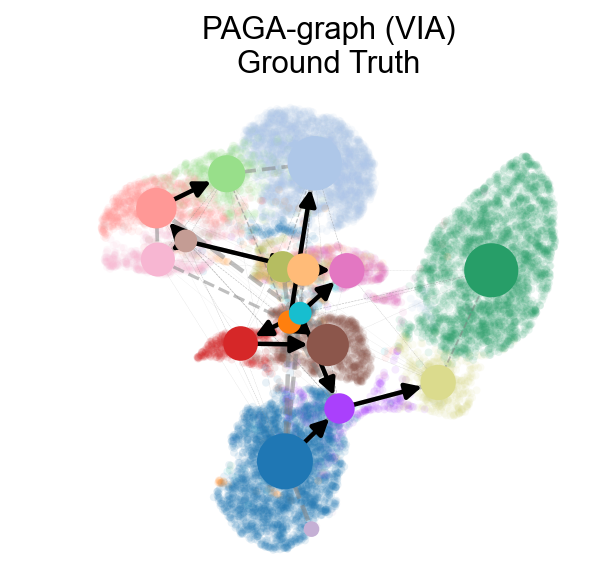

In [64]:
#fig, ax = plt.subplots(figsize=(3,3))
import matplotlib.pyplot as plt
ax=scv.pl.paga(adata_mouse, basis='umap_raw', size=50, alpha=.1,title='PAGA-graph (VIA)\nGround Truth',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
plt.savefig("figures/review/hsc_mouse_paga_graph_ground.png",dpi=300,bbox_inches = 'tight')

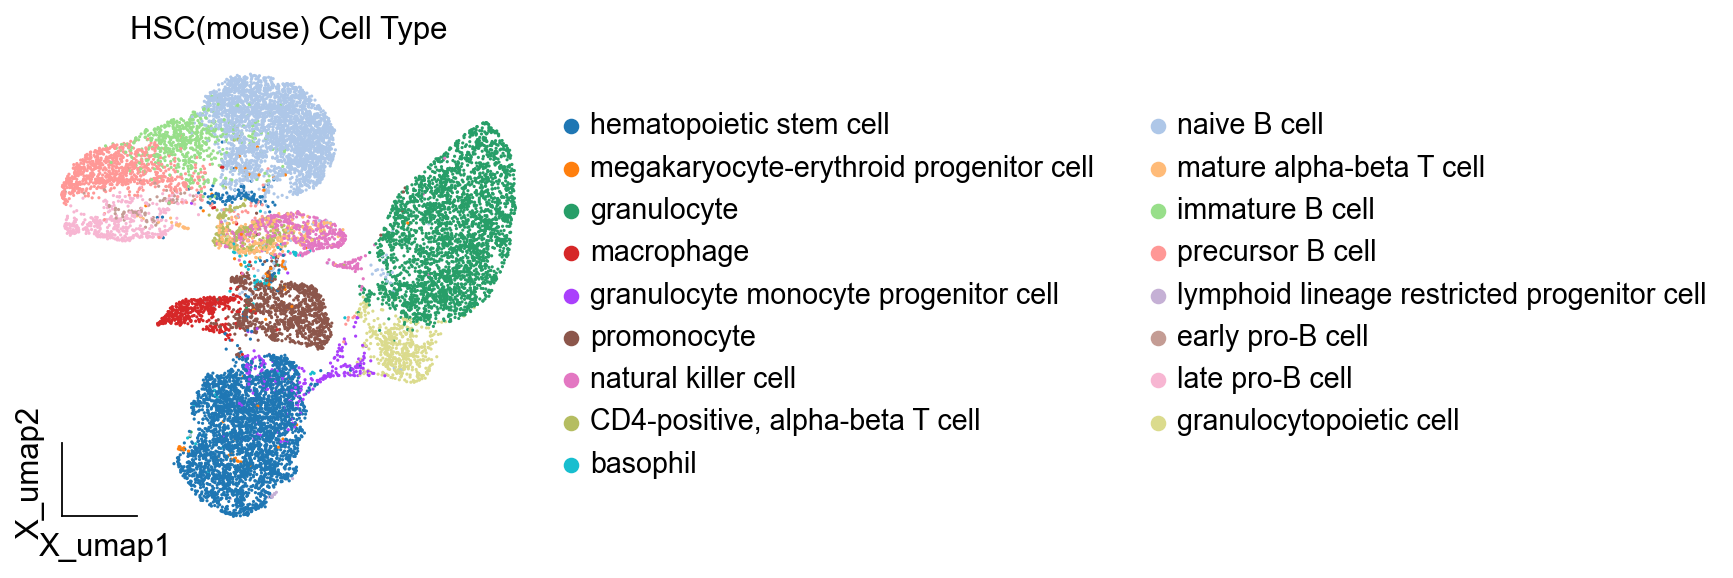

In [46]:
ov.pl.embedding(
    adata_mouse,
    basis='X_umap',
    color='cell_type',
    frameon='small',show=False,
)
plt.title('HSC(mouse) Cell Type')
plt.savefig("figures/review/hsc_mouse_ct.png",dpi=300,bbox_inches = 'tight')

In [49]:
adata_mouse.obsm['X_umap_raw']=adata_mouse.obsm['X_umap']

In [ ]:
sc.pp.neighbors(ltnn_obj.adata,use_rep='X_pca')

In [51]:
ov.pp.umap(ltnn_obj.adata)

<AxesSubplot: title={'center': 'HSC(mouse) Pseudotime'}, xlabel='X_umap1', ylabel='X_umap2'>

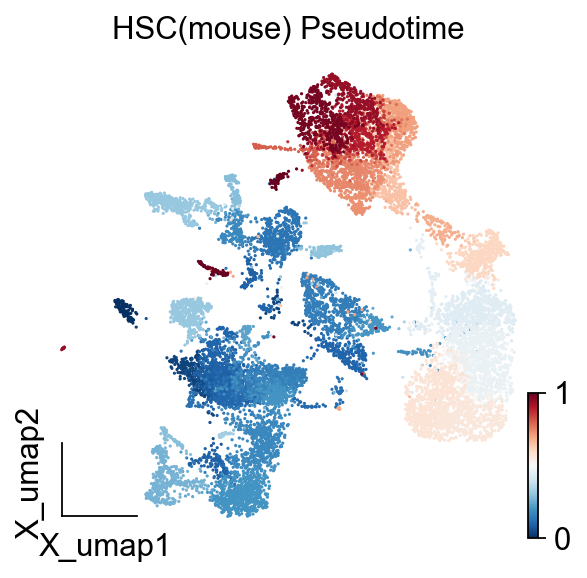

In [52]:
ov.pl.embedding(
    ltnn_obj.adata,
    basis='X_umap',
    color='pt_via',
    title='HSC(mouse) Pseudotime',
    frameon='small',show=False,
)
#plt.title()
#plt.savefig("figures/review/hsc_mouse_pt.png",dpi=300,bbox_inches = 'tight')